In [2]:
import pandas as pandas
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pandas.read_csv('Data/EcommerceCustomers.csv')

In [4]:
data.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [7]:
data.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


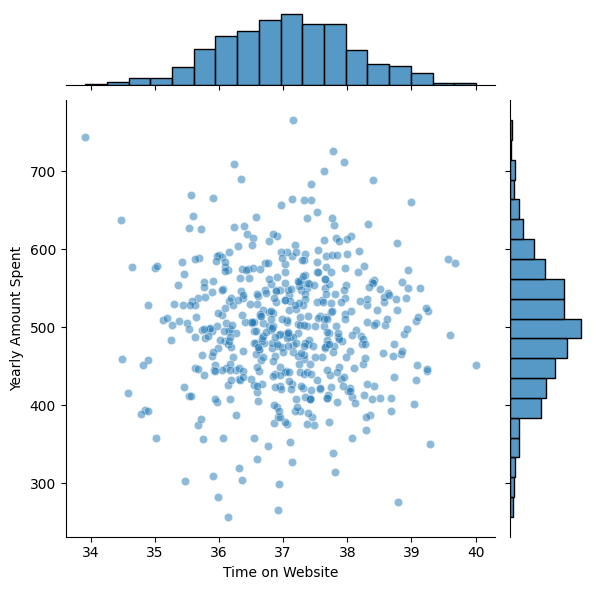

In [9]:
# Exploritory Data Analysis (EDA)
sns.jointplot(x='Time on Website', y='Yearly Amount Spent', data=data, alpha=0.5)

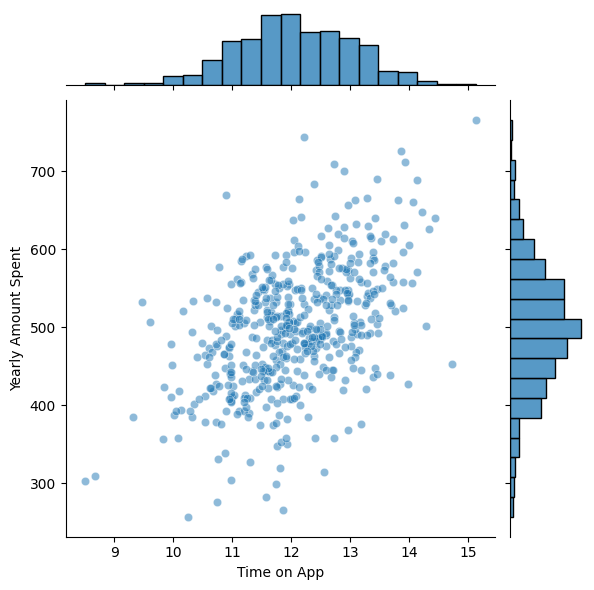

In [10]:
sns.jointplot(x='Time on App', y='Yearly Amount Spent', data=data, alpha=0.5)

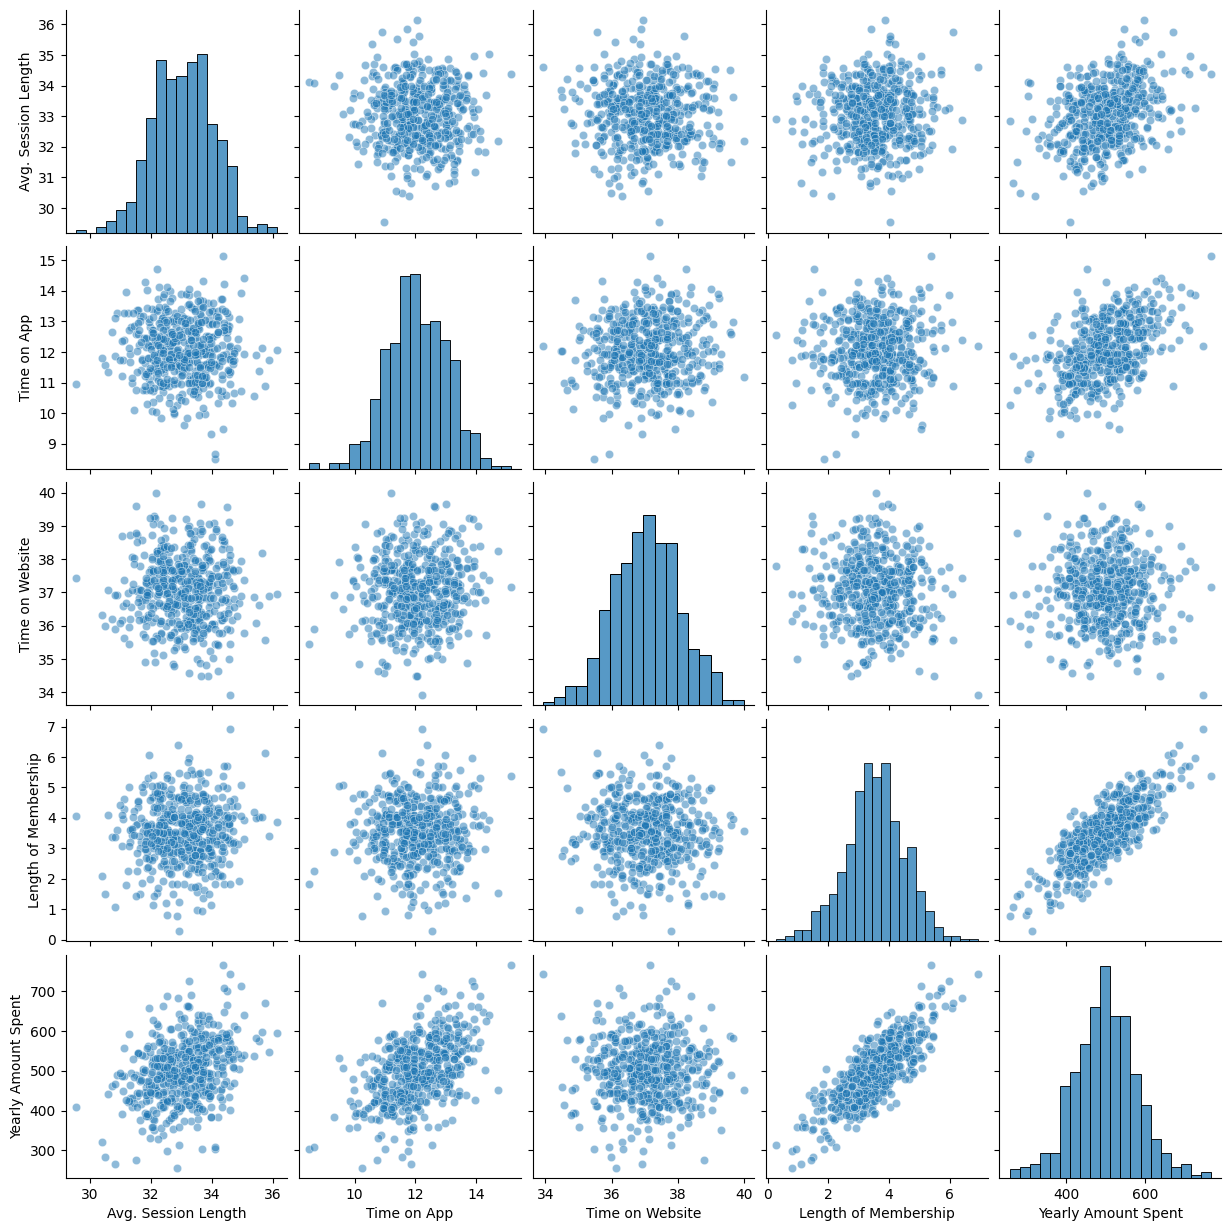

In [11]:
sns.pairplot(data, kind='scatter', plot_kws={'alpha':0.5})

- Cleary we only want to look at the last column as this is what we are interested in the Yearly Amount spent. 
- We are trying to look for some type of linear correlation, can see that time on app and length of membership are promising

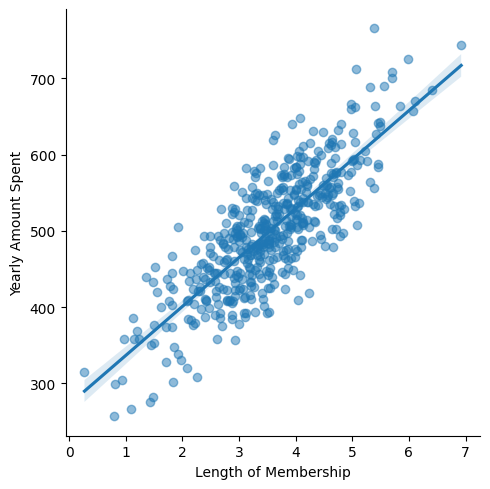

In [12]:
sns.lmplot(x='Length of Membership', y='Yearly Amount Spent', data=data, scatter_kws={'alpha':0.5})

## What is happening when we do a Linear Regression?
essentially from my understanding what is happening is we first lay down a line, then with every dot or point we calculate the distance from the dot to the line and square it, after that we add up all the distances together. we keep plotting lines until we have the line where the sum of the square of the distances is the smallest amount, this is the line of best fit

In [14]:
from sklearn.model_selection import train_test_split

In [23]:
X = data[['Avg. Session Length','Time on App', 'Time on Website', 'Length of Membership']]
y = data['Yearly Amount Spent']

In [24]:
#Split training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
#random_state is the seed for the random number generator essentially making the split deterministic

In [26]:
X_test

,Avg. Session Length,Time on App,Time on Website,Length of Membership
18,32.187812,14.715388,38.244115,1.516576
361,32.077590,10.347877,39.045156,3.434560
104,31.389585,10.994224,38.074452,3.428860
4,33.330673,12.795189,37.536653,4.446308
156,32.294642,12.443048,37.327848,5.084861
...,...,...,...,...
147,32.255901,10.480507,37.338670,4.514122
346,32.765665,12.506548,35.823467,3.126509
423,33.128693,10.398458,36.683393,3.859818
17,32.338899,12.013195,38.385137,2.420806


# Trainging the module

In [27]:
from sklearn.linear_model import LinearRegression

In [28]:
lm = LinearRegression()

In [29]:
lm.fit(X_train, y_train)

LinearRegression()

In [31]:
lm.coef_

array([25.98154972, 38.59015875,  0.19040528, 61.27909654])

- this basically shows the coeffients of the x variable to form the line of best fit
- any straight line is in the form y = mx+c, these are the m values for given column as seen below

In [35]:
cdf = pandas.DataFrame(lm.coef_, X.columns, columns=['Coeff'])
cdf

,Coeff
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


- This shows us how important each column is to a linear model, or how important each variable is to our linear model
- $y = c + m1x1+ m2x2+ m3x3 +m4x4$

- so from this we can see the variable that has the greatest impact to a lm is length of Membership then time on app then session length and we see that there is hardly any correlation between time on website with the test data

# Predictions

In [37]:
predictions = lm.predict(X_test)

Text(0.5, 1.0, 'Predicted vs Actual Y')

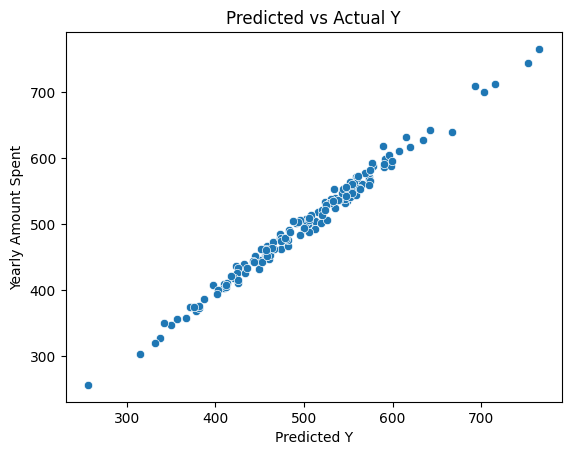

In [41]:
sns.scatterplot(x=predictions, y=y_test)
plt.xlabel('Predicted Y')
plt.title('Predicted vs Actual Y')    

In [42]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math

In [43]:
print("Mean Absolute Error: ", mean_absolute_error(y_test, predictions))
print("Mean Squared Error: ", mean_squared_error(y_test, predictions))
print("Root Mean Squared Error: ", math.sqrt(mean_squared_error(y_test, predictions)))

Mean Absolute Error:  7.228148653430845
Mean Squared Error:  79.81305165097457
Root Mean Squared Error:  8.93381506697864


# What these numbers mean?
- Mean Absolute Error: this is essentially saying that the average distance from a point to the line is 7, given that we are working in $ and most of the numbers are above $300 this is pretty good, we get with in +- 8
- Mean Squared Error: this is the same as before but the number is squared, so futher outliers make the number more penalised meaning points that stray away futher from the line make the number bigger exponentially
- Essentially takes the mean squared error and brings it back to the original units of the target variable to it can be compared with the mean absolute error

# Residuals

In [44]:
residuals = y_test - predictions
residuals

18    -4.126186
361   -1.686918
104    0.816457
4      7.975058
156   -3.858503
         ...   
147    1.431172
346    3.977230
423    3.521249
17    -3.822028
259   -0.080551
Name: Yearly Amount Spent, Length: 150, dtype: float64

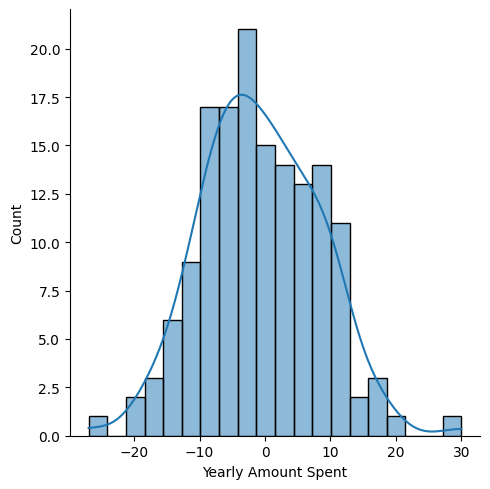

In [46]:
sns.displot(residuals, bins=20, kde=True)

so essentially with residuals and linear models in general the residuals should be random and we should expect a normal distribution, if we dont get a normal distribution that mean are model is skewed. This could show that the system is biased meaning the system overestimates some variables and under estimates others, an other issue could be the predictive performance, a skewed model may not be well suited to new data, reducing its predictive performance (overfitting?).

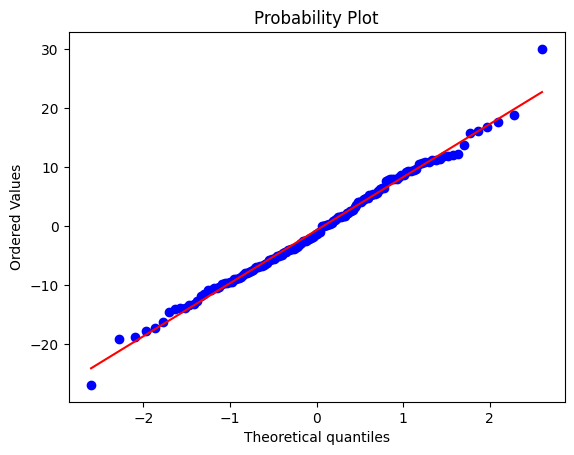

In [47]:
import pylab
import scipy.stats as stats
stats.probplot(residuals, dist='norm', plot=pylab)
pylab.show()

This essentially is plottin the residuals to a normal distribution, we want the residuals to be as close as possible to normal